In [6]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import plotly.plotly as py
py.sign_in('smrithi2387','Beue2KLjC12mP62SC81X')
import seaborn as sns
#offline.init_notebook_mode()

In [7]:
#The data is imported 
try:
   df1= pd.read_excel('GHGnew.xlsx',sheetname='GHG_Emissions')

except:
    print("File not found") 
    
df1.to_excel("data1.xlsx")

dfx=pd.read_excel('data1.xlsx')
dfx.shape
dfx.columns
dfx.head()
dfx = dfx.fillna(0)

In [8]:
try:
   df2= pd.read_excel('GHGnew.xlsx',sheetname='Emission sources')

except:
    print("File not found") 
    
df2.to_excel("data2.xlsx")

dfnew5=pd.read_excel('data2.xlsx')

dfnew5.info()
dfnew5.head()
dfnew5 = dfnew5.fillna(0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4785 entries, 0 to 4784
Data columns (total 13 columns):
Country                       4785 non-null object
Year                          4785 non-null int64
Energy                        4785 non-null float64
Industrial_Process            4785 non-null float64
Agriculture                   4785 non-null float64
Waste                         4785 non-null float64
Landuse_forestry              4785 non-null float64
Bunkerfuels                   4785 non-null float64
Electricity_heat              3953 non-null float64
Manufacturing_construction    3457 non-null float64
Transport                     3457 non-null float64
Otherfuel_combustion          4329 non-null float64
Fugitive_emissions            4663 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 523.4+ KB


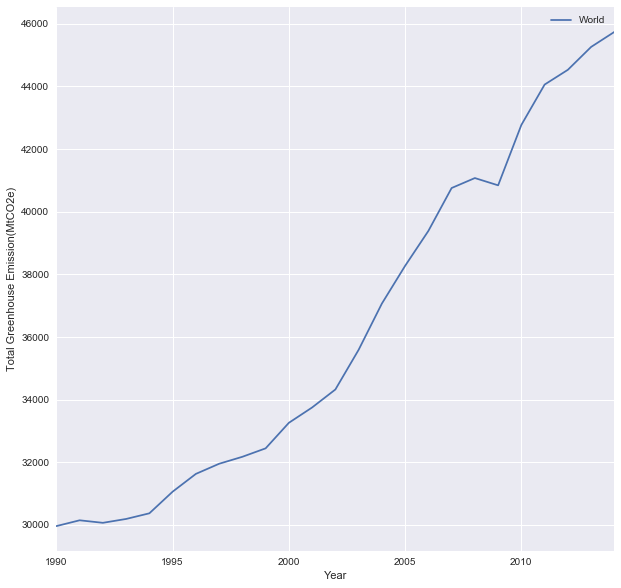

In [9]:

dfnew4=dfx[dfx['Country']=='World']

dfnew2=dfnew4.set_index(['Year','Country']).sort_values(by='Total_GHG',ascending=False)

dfnew1=dfnew2.unstack()[['Total_GHG']]
dfnew1.columns=dfnew1.columns.droplevel()
dfnew1.plot.line(figsize=(10,10))
plt.xlabel('Year')
plt.ylabel('Total Greenhouse Emission(MtCO2e)')
plt.legend(loc="best")
plt.show()




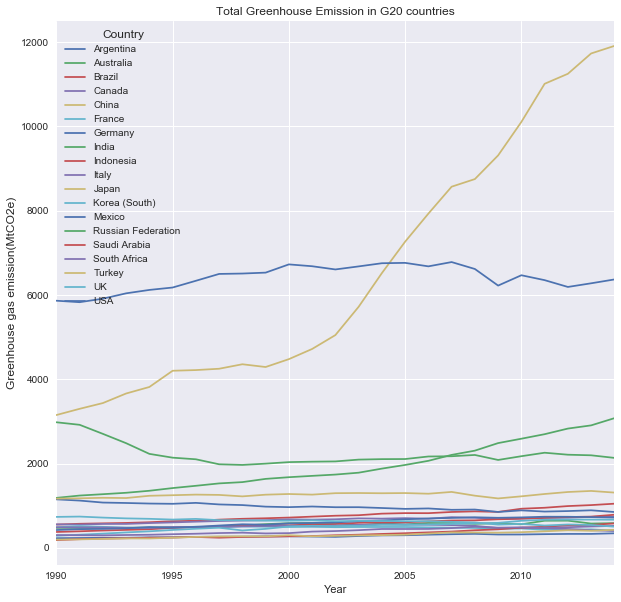

In [10]:
# The Greenhouse emissions by the G20 countries of the world to identify the top emitters
dfx1=dfx[dfx['Country'].isin(['World','USA','UK','Russian Federation','Argentina','France','Germany','Italy','Japan','Canada','China','Brazil','Indonesia','India','Australia','Turkey','Mexico','Saudi Arabia','South Africa','Korea (South)'])]
dfnew3=dfx1[dfx1['Country']!='World']

dfnew=dfnew3.set_index(['Year','Country']).sort_values(by='Total_GHG',ascending=False)

dfnew=dfnew.unstack()[['Total_GHG']]
dfnew.columns=dfnew.columns.droplevel()
ax=dfnew.plot.line(figsize=(10,10))
ax.set_ylabel("Greenhouse gas emission(MtCO2e)",fontsize=12)
plt.title('Total Greenhouse Emission in G20 countries')
#plt.ylabel('Total Greenhouse Emission(MtCO2e)')
#plt.legend(loc="best")
plt.show()

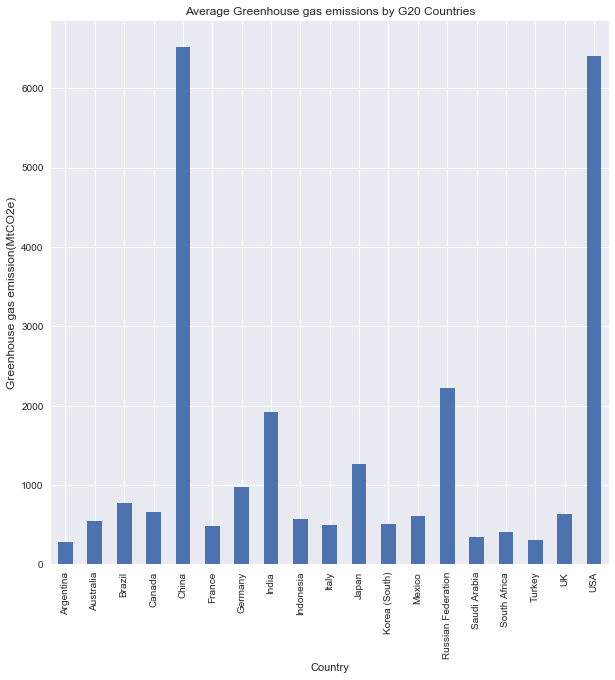

In [11]:
#Average greenhouse gas emissions over 20 years for the G20 countries
ax1=dfnew.mean().plot.bar(figsize=(10,10),title='Average Greenhouse gas emissions by G20 Countries')
ax1.set_ylabel("Greenhouse gas emission(MtCO2e)",fontsize=12)
plt.show()



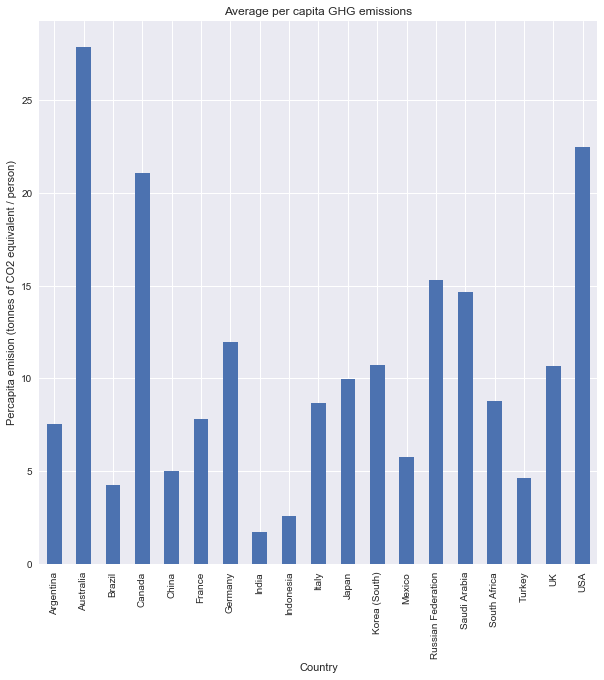

In [12]:
 #Average percapita Greenhouse gas emissions for the G20 countries
dfnew1=dfnew3.set_index(['Country'])

dfnew1['Per_Capita_GHG']=dfnew1['Total_GHG']/dfnew1['Population']

#dfnew1['Per_Capita_GHG'].plot.line(figsize=(10,10))
(dfnew1['Per_Capita_GHG']*1000000).groupby('Country').mean().plot.bar(figsize=(10,10))
plt.title('Average per capita GHG emissions')

plt.ylabel('Percapita emision (tonnes of CO2 equivalent / person)')
plt.show()

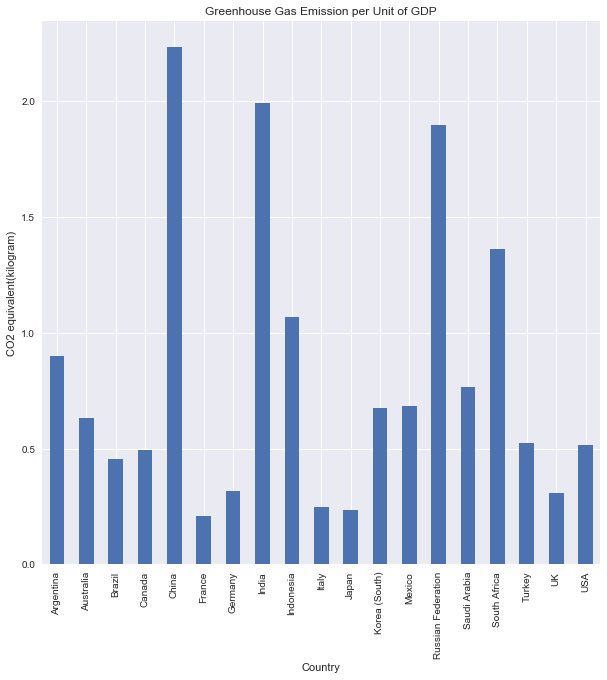

In [13]:
# Average Greenhouse gas emission per unit of GDP of G20 countries where GDP is in 
dfnew1['GHG_Per_Capita_GDP']=(dfnew1['Total_GHG']*1000)/(dfnew1['GDP'])
ax3=dfnew1['GHG_Per_Capita_GDP'].groupby('Country').mean().plot.bar(figsize=(10,10))
plt.title('Greenhouse Gas Emission per Unit of GDP')
ax3.set_xlabel('Country')
ax3.set_ylabel('CO2 equivalent(kilogram)')
plt.show()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


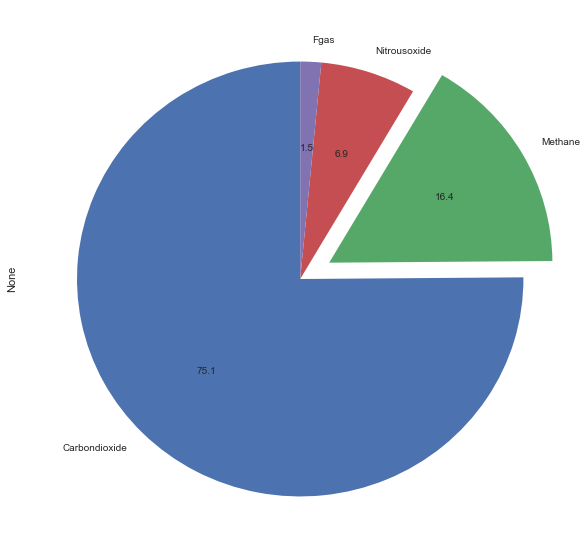

In [14]:
# G20 percent emission trend of Carbondioxide,methane,nitrousoxide and F gas
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from plotly.graph_objs import *
init_notebook_mode()

dfx1.set_index('Year')

L=['Carbondioxide','Methane','Nitrousoxide','Fgas']
dfwgas=dfx1[L]


data= dfwgas.mean().plot.pie(subplots=True, autopct='%0.1f',
                                   fontsize=10,figsize=(10,10),
                                   legend=False,
                                   labels=L,
                                   shadow=False,
                    explode=(0,0.15,0,0),
                                   startangle=90)

plt.show()

In [15]:

def emissions(gas):
 dfx2=dfx1.set_index(['Year','Country'])
 
 for i in range(1994,2017,5):
        if(i<=2014) :   
            dfxnew=dfx2.loc[i]
            ax4=dfxnew[gas].plot.bar(figsize=(10,10),title=i)
            ax4.set_ylabel('Amount of '+str(gas)+'(MtCo2 / MtCo2e)')
            plt.show()
            
            

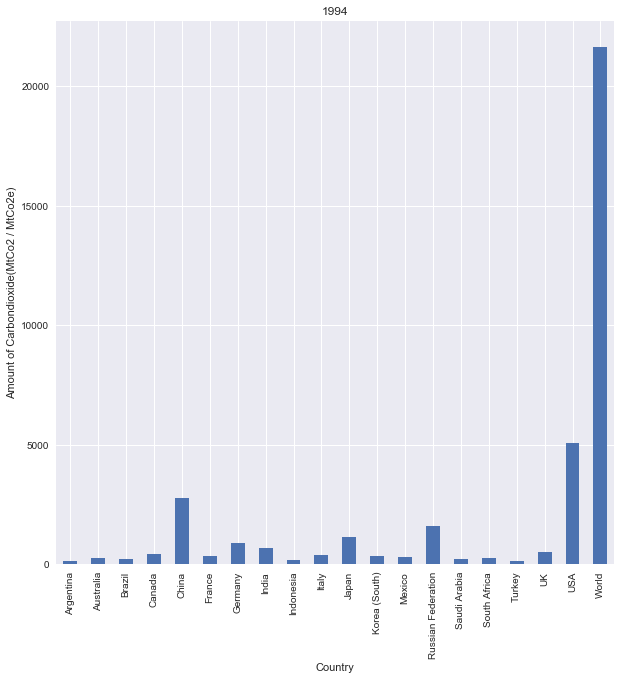

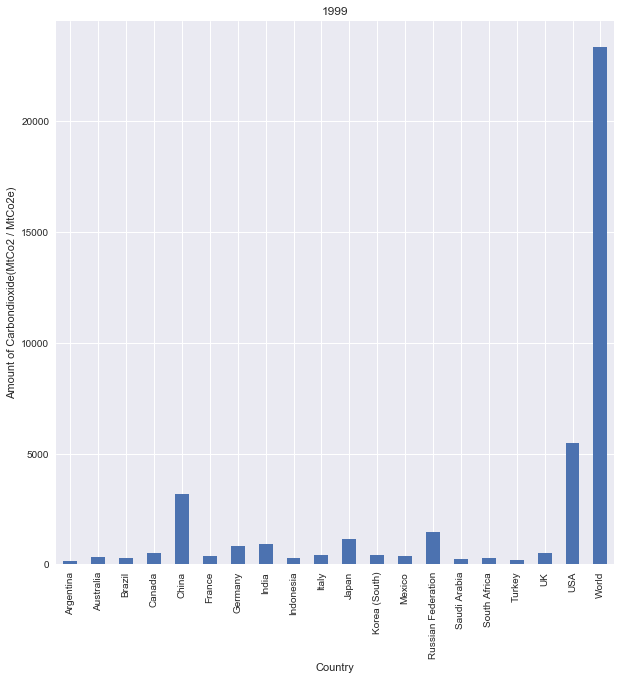

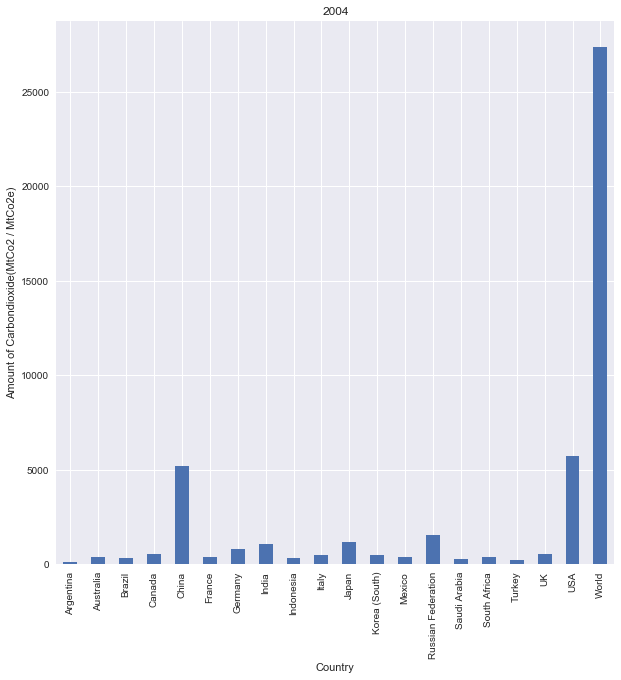

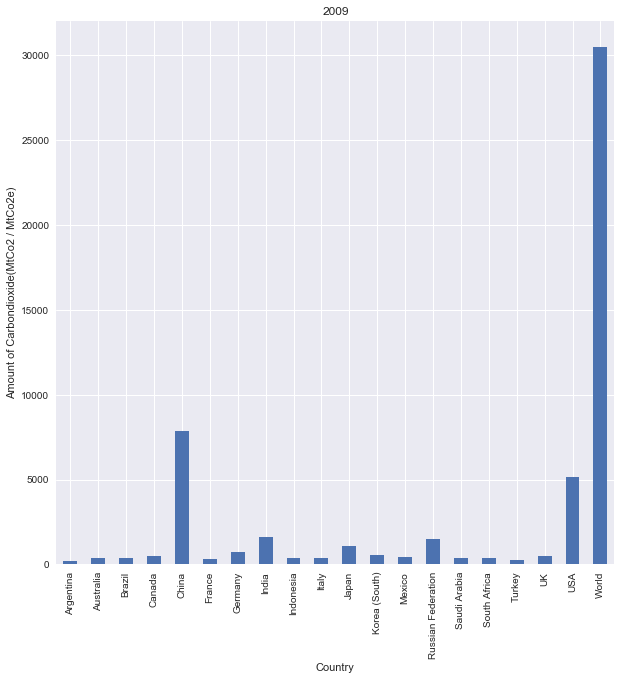

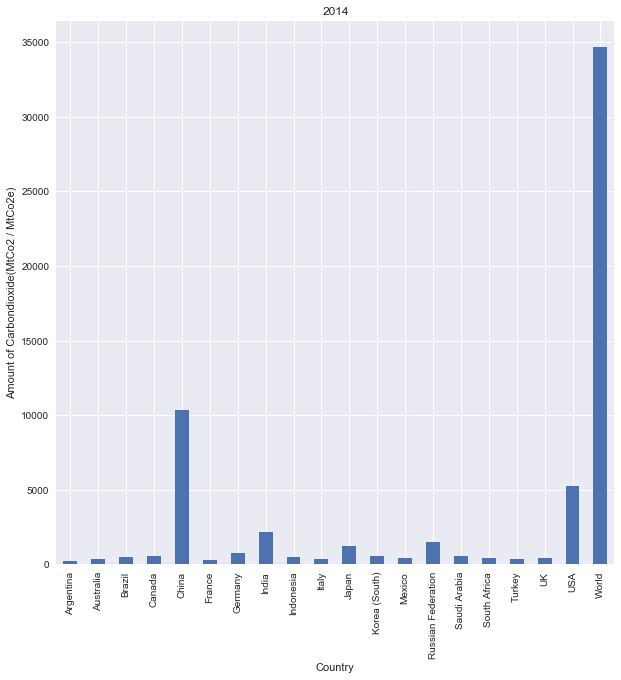

In [16]:
emissions('Carbondioxide')

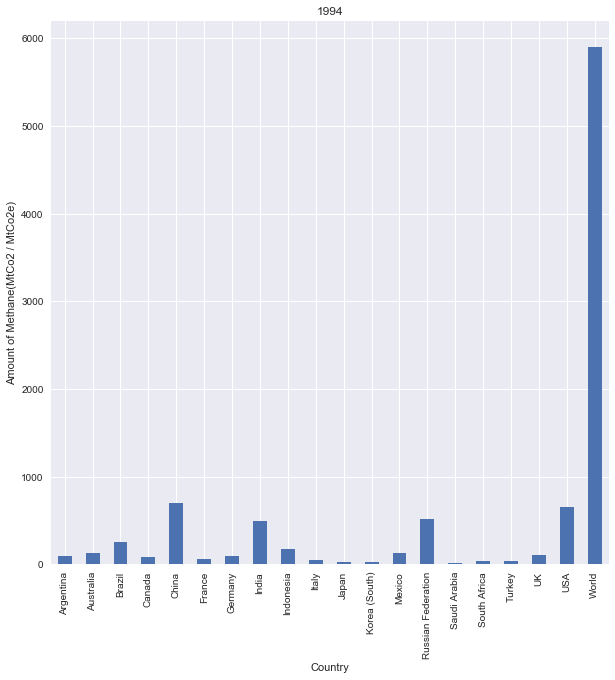

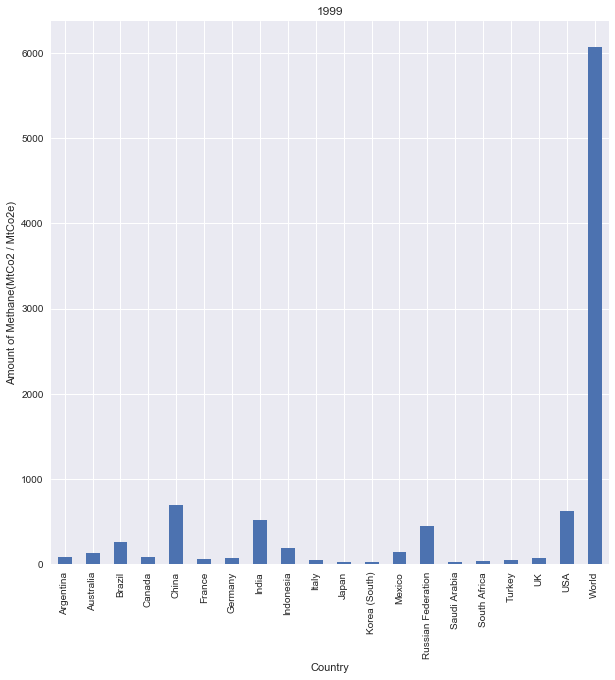

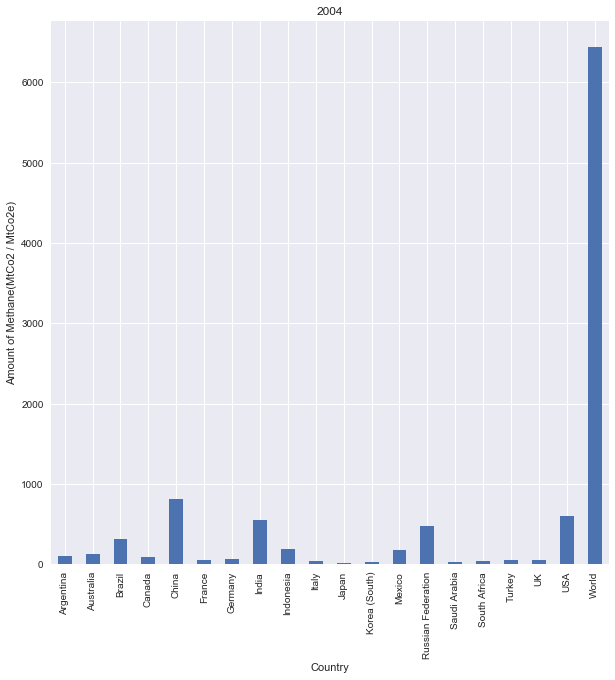

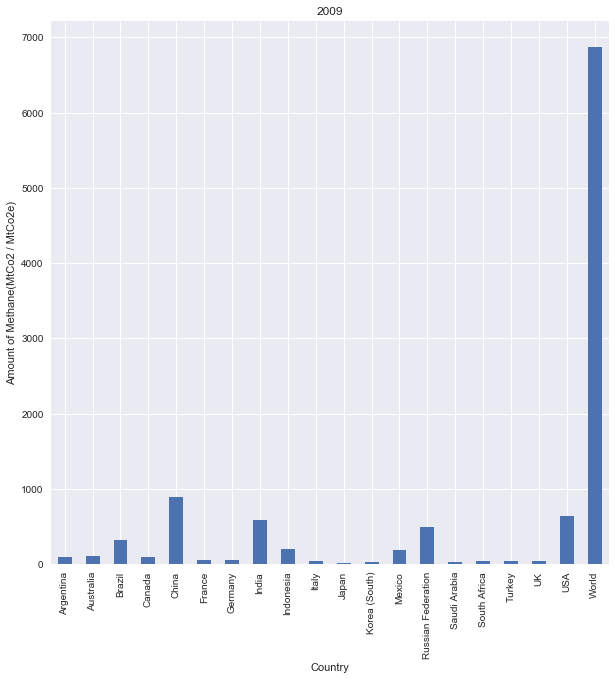

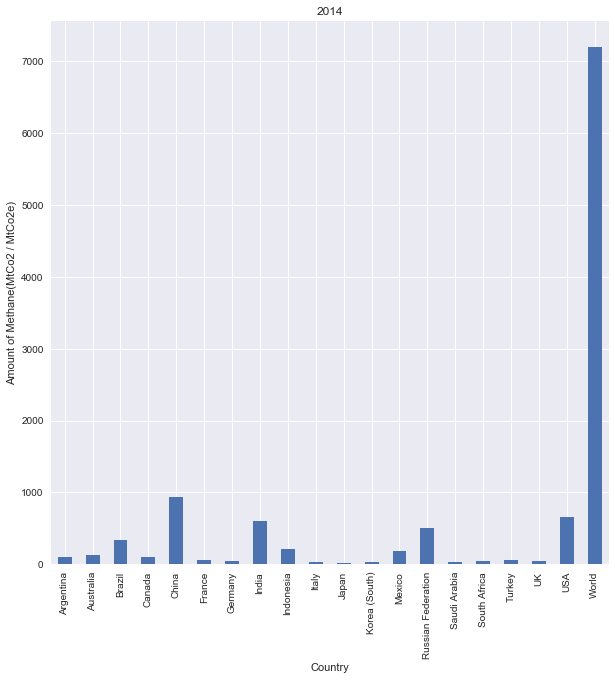

In [17]:
emissions('Methane')

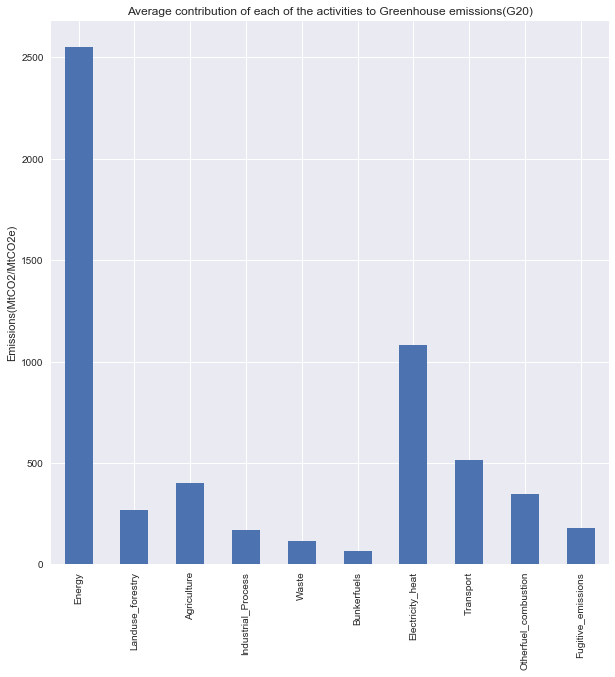

In [18]:
L=['Energy','Landuse_forestry','Agriculture','Industrial_Process','Waste','Bunkerfuels','Electricity_heat','Transport','Otherfuel_combustion','Fugitive_emissions']
dfg20=dfnew5[dfnew5['Country'].isin(['World','USA','UK','Russian Federation','Argentina','France','Germany','Italy','Japan','Canada','China','Brazil','Indonesia','India','Australia','Turkey','Mexico','Saudi Arabia','South Africa','Korea (South)'])]
dfactivityg20=dfg20[L]
ax9=dfactivityg20.mean().plot.bar(figsize=(10,10),title='Average contribution of each of the activities to Greenhouse emissions(G20)')
ax9.set_ylabel('Emissions(MtCO2/MtCO2e)')
plt.show()


In [19]:
#Percentage contribution of each of these activities in G20 countries
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode()
data=(dfactivityg20.mean()/dfactivityg20.mean().sum() *100)
labels = L
values = data
colors = ['#FXBFB3', '#E1396C', '#96C38C', '#D0F8B1']

trace = go.Pie(labels=labels, values=values,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=10),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))

py.iplot([trace], filename='Greenhouse gas emissions')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [20]:
#Average Greenhouse gas emission from the Energy,Electricity and heat, and Transport sectors in the top 5 greenhouse gas emitting G20 countires


dfUSA=dfnew5[dfnew5['Country']=='USA']
dfChina=dfnew5[dfnew5['Country']=='China']
dfIndia=dfnew5[dfnew5['Country']=='India']
dfJapan=dfnew5[dfnew5['Country']=='Japan']
dfRF=dfnew5[dfnew5['Country']=='Russian Federation']


import plotly.plotly as py
import plotly.graph_objs as go

import pandas as pd
import numpy as np


data = [
    go.Bar(
        x=dfUSA['Country'], # assign x as the dataframe column 'x'
        y=dfUSA['Electricity_heat'].mean(),
        name='USA_Electricity_heat(MtCO2)'
       
    ),
    go.Bar(
        x=dfUSA['Country'],
        y=dfUSA['Energy'].mean(),
        name='USA_Energy(MtCO2)'
    ),
    go.Bar(
        x=dfUSA['Country'],
        y=dfUSA['Transport'].mean(),
        name='USA_Transport(MtCO2)'
    ),
    go.Bar(
        x=dfChina['Country'],
        y=dfChina['Electricity_heat'].mean(),
        name='China_Electricity_heat(MtCO2)'
    ),
    go.Bar(
        x=dfChina['Country'],
        y=dfChina['Energy'].mean(),
        name='China_Energy(MtCO2)'
    ),
    go.Bar(
        x=dfChina['Country'],
        y=dfChina['Transport'].mean(),
        name='China_Transport(MtCO2)'
    ),
     go.Bar(
        x=dfRF['Country'],
        y=dfRF['Electricity_heat'].mean(),
        name='Russia_Electricity_heat(MtCO2)'
    ),
     go.Bar(
        x=dfRF['Country'],
        y=dfRF['Energy'].mean(),
        name='Russia_Energy(MtCO2)'
    ),
     go.Bar(
        x=dfRF['Country'],
        y=dfRF['Transport'].mean(),
        name='Russia_Transport(MtCO2)'
    )
]

layout = go.Layout(
    barmode='stack',
    title='Stacked Bar with Pandas'
)

fig = go.Figure(data=data, layout=layout)


py.iplot(data, filename='pandas-bar-chart-layout')

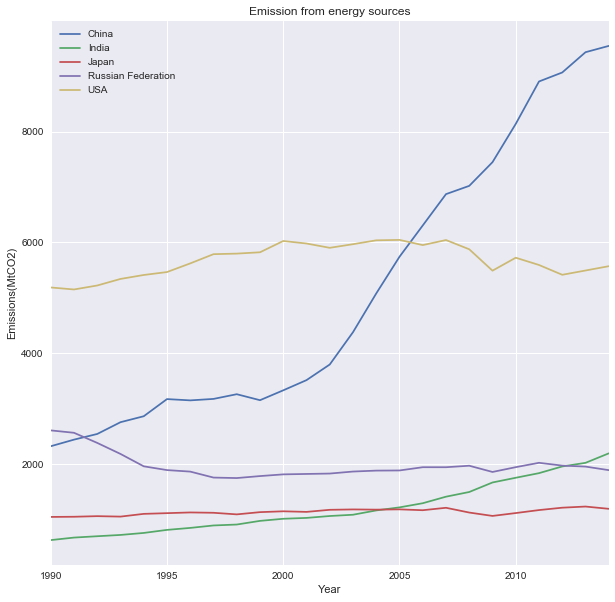

In [21]:
#Greenhouse gas emission trends of the top 5 GHG emitters over the span of 1990 to 2014 from Energy
dfnew6=dfnew5[dfnew5['Country'].isin(['USA','Russian Federation','Japan','China','India'])]
dfnew7=dfnew6.set_index(['Year','Country']).sort_values(by='Energy',ascending=False)

dfnew7=dfnew7.unstack()[['Energy']]
dfnew7.columns=dfnew7.columns.droplevel()
ax6=dfnew7.plot.line(figsize=(10,10),title='Emission from energy sources')
ax6.set_ylabel('Emissions(MtCO2)')
plt.legend(loc="best")
#plt.title('Emission from energy sources')
#plt.xlabel('Year')

plt.show()



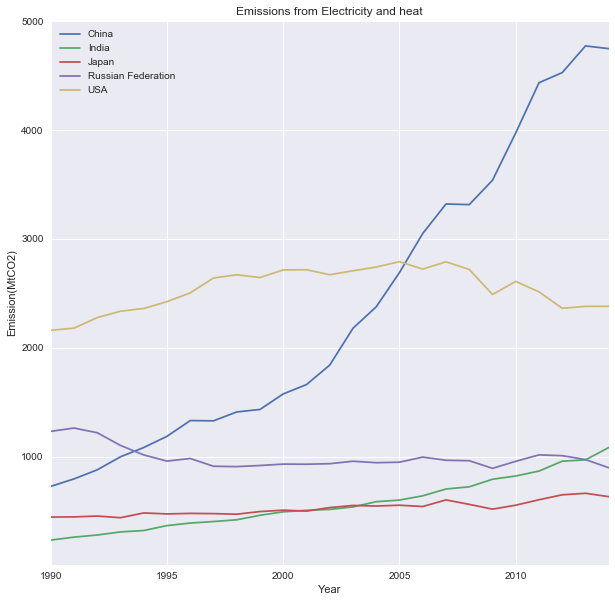

In [22]:
#Greenhouse gas emission trends f the top 5 GHG emitters over the span of 1990 to 2014 from Electricity and heat
dfnew8=dfnew6.set_index(['Year','Country']).sort_values(by='Energy',ascending=False)

dfnew8=dfnew8.unstack()[['Electricity_heat']]
dfnew8.columns=dfnew8.columns.droplevel()
ax7=dfnew8.plot.line(figsize=(10,10),title='Emissions from Electricity and heat')
ax7.set_ylabel('Emission(MtCO2)')
plt.legend(loc="best")
plt.show()

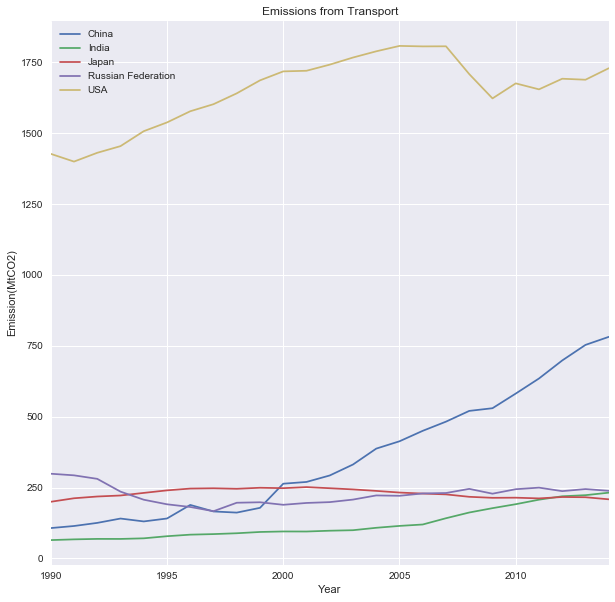

In [23]:
#Greenhouse gas emission trends f the top 5 GHG emitters over the span of 1990 to 2014 from Transport

dfnew9=dfnew6.set_index(['Year','Country']).sort_values(by='Energy',ascending=False)

dfnew10=dfnew9.unstack()[['Transport']]
dfnew10.columns=dfnew10.columns.droplevel()
ax8=dfnew10.plot.line(figsize=(10,10),title='Emissions from Transport')
ax8.set_ylabel('Emission(MtCO2)')
plt.legend(loc="best")
plt.show()